https://lmfit.github.io/lmfit-py/parameters.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import latexify

from lmfit import Minimizer, Parameters, create_params, report_fit

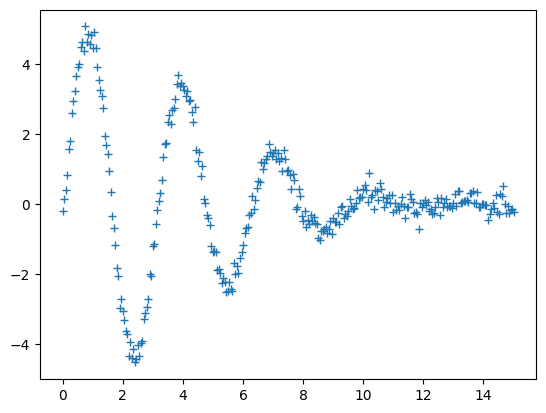

In [2]:
# create data to be fitted
x = np.linspace(0, 15, 301)
np.random.seed(2021)
data = (5.0 * np.sin(2.0*x - 0.1) * np.exp(-x*x*0.025) + np.random.normal(size=x.size, scale=0.2))
plt.plot(x, data, '+')

In [3]:
# define objective function: returns the array to be minimized
def fcn2min(params, x, data=None):
    """Model a decaying sine wave and subtract data."""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x*omega + shift) * np.exp(-x*x*decay)
    if data is None:
        return model
    return model-data

In [4]:
# latexify.expression works similarly, but does not output the signature.
@latexify.expression
def solve(amp, shift, omega, decay, x):
    return amp * math.sin(x*omega + shift) * math.exp(-x*x*decay)
solve

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 228
    # data points      = 301
    # variables        = 4
    chi-square         = 16.6536849
    reduced chi-square = 0.05607301
    Akaike info crit   = -863.238107
    Bayesian info crit = -848.409666
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    amp:    4.96716529 (init = 10)
    decay:  0.02457929 (init = 0.1)
    shift:  0.00561143 (init = 0)
    omega:  1.97321755 (init = 3)


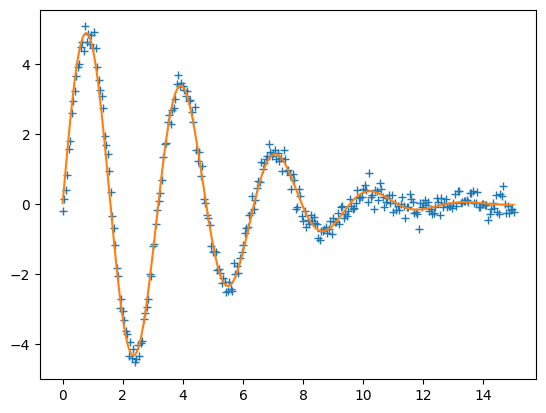

Bad pipe message: %s [b'0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nHost: localhost:41299\r\nUs', b'-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.']
Bad pipe message: %s [b'0.0 Safari/537.36\r\nAccept-Encoding: gzip, defla']
Bad pipe message: %s [b', br, zstd\r\nAccept-Language: sk-SK,sk;q=0.9\r\nCache-Control: max-age=0\r\nReferer: https://crispy-disco-vp99xp4447fwpx', b'github.dev/\r\nX-Request-ID: 6bdc00102c460beaa421ed81b1b61c30\r\nX-Real-IP: 10.240.0.10\r\nX-Forwarded-Port: 44']
Bad pipe message: %s [b'\nX-Forwarded-Scheme: https\r\nX-Original-URI: /\r\nX-S', b'eme: https\r\nsec-fetch-site: same-site\r\nsec-fetch-mode: navigate\r\nsec-fetch-dest: document\r\nsec-ch-']
Bad pipe message: %s [b': "Not A(Brand";v="8", "Chromium";v="132", "Google Chrome";v="132"\r\nsec-ch-ua-mobile: ?0\r\nsec-ch-ua-platform: "Windo', b'"\r\npriority: u=0, i\r\nX-Original-Proto: https\r\nX-Forwarded-Proto:

In [ ]:
# create a set of Parameters
params = Parameters()
params.add('amp', value=10, min=0)
params.add('decay', value=0.1)
params.add('shift', value=0.0, min=-np.pi/2., max=np.pi/2.)
params.add('omega', value=3.0)

# do fit, here with the default leastsq algorithm
result = Minimizer(fcn2min, params, fcn_args=(x, data)).scalar_minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
try:
    plt.plot(x, data, '+')
    plt.plot(x, final)
    plt.show()
except ImportError:
    pass